# Numerisk løsning av differensialligninger

Differensialligninger er ligninger som beskriver endringer av størrelser, og er ligninger som involverer en ukjent funksjon $x(t)$ av en variabel $t$ og dens deriverte $x'(t)$ med hensyn på denne variabelen.

Vi begynner med å se på differensialligninger for en skalar funksjon $x(t)$ av den skalare variabelen $t$.
Generelt vil disse være på formen
$$ x' = f(t,x) \tag{3.1} $$
Problemet der vi vil løse (3.1) for en gitt startverdi (initialverdi) $x(s)$ for et gitt argument $s$ kalles for et startverdiproblem (initialverdiproblem), og det er vanlig å sette $s=0$.
Navnet kommer av at vi kan tenke på den uavhengige variabelen $t$ som en tid, og $x(t)$ er "tilstanden" til systemet ved tid $t$.
Differensialligningen uttrykker da hvordan størrelsen $x(t)$ endrer seg over tid fra starttilstanden $x(0)$.

For at vi skal være i stand til å skrive ned et generelt uttrykk for løsningen av (3.1), altså eksplisitt skrive $x(t)$ som en funksjon av $t$, må høyresiden $f = f(t,x)$ typisk være på en spesiell form.
Et tilfelle hvor dette kan være mulig er dersom differensialligningen er separabel, altså når $f$ er på formen $f(t,x) = g(t) h(x)$ for funksjoner $g$ og $h$.

> #### Eksempel (separabel differensialligning):
Vi er gitt startverdiproblemet
$$ x' = -2tx^2, \qquad x(0) = 1. $$
Denne differensialligningen er separabel, og vi kan derfor formelt skrive den om til 
$$ -\int \frac{\mathrm{d}x}{x^2} = \int 2t \mathrm{d}t \quad \text{som vi integrerer og finner} \quad \frac{1}{x} = t^2 + C $$
for en vilkårlig konstant $C$. Den generelle løsningen av differensialligningen er derfor
$$ x(t) = \frac{1}{t^2 + C}.$$
Løsningen av startverdiproblemet finner vi ved å bestemme verdien av $C$ slik at $x(0) = 1$ er oppfylt. Dette ser vi at er tilfelle for $C = 1$.

At $f$ ikke er på en slik form betyr likevel ikke at ligningen (3.1) ikke har løsninger.
På samme måte som at ligningen $f(x) = 0$ kan ha løsninger $x$ (en verdi) uten at disse kan skrives ned eksakt, så kan også differensialligningen (3.1) ha løsninger $x(t)$ (en funksjon) uten at disse kan skrives ned som formler.
Vi skal derfor se hvordan vi kan tilnærme løsninger av (3.1) numerisk.

Numeriske løsninger av differensialligningen (3.1) tar typisk utgangspunkt i det tilhørende startverdiproblemet. 
Gitt startverdien $x(0) = x_0$ og en tid $T > 0$ vil vi finne en tilnærming av verdien til $x$ ved tiden $T$, altså $x(T)$.

## Eulers metode
Én måte å tilnærme løsninger av (1) på er Eulers metode, som er basert på foroverdifferansen som vi allerede har sett.
Vi begynner med en partisjon $\{t_n\}_{n=0}^{N}$ av intervallet $[0,T]$, hvor vi for enkelhets skyld velger en jevn oppdeling med $h = T/N$ sånn at $t_n = n h$.
Idéen er da at ved $t=t_n$ er forhåpentlig foroverdifferansen en god tilnærming av den deriverte $x'(t_n)$, det vil si,

$$ \frac{x(t_n+h)-x(t_n)}{h} \approx f(t_n,x(t_n)). $$

Dersom $x(t_n)$ er kjent, kan vi med sammenhengen ovenfor finne en tilnærming av $x(t_{n+1}) = x(t_n+h)$.
På denne måten kan vi fortsette inntil vi har en tilnærming av $x(T) = x(t_N)$.

For $t_0 = 0$ har vi $x(t_0) = x_0$, den eksakte verdien, men for alle andre $t_n$ vil vi bare ha tilnærminger av $x(t_n)$, og vi kaller disse tilnærmingene $x_n$.

> #### Eulers metode
Vi ser på differensialligningen (3.1) med startverdi $x(0) = x_0$. For en gitt steglengde $h > 0$ og $t_n = n h$, så er tilnærmingen $x_{n+1}$ av $x(t_{n+1})$ med Eulers metode gitt av
$$ x_{n+1} = x_n + h f(t_n, x_n), \quad n = 0, 1, \dots $$

> #### Eksempel:
Vi ser på differensialligningen
$$ x'(t) = \lambda x(t) \tag{3.2} $$
for en reell konstant $\lambda$ og startverdi $x(0) = x_0$, og vil finne løsningen for $t = T > 0$. Vi setter $h = T/N$ og $t_n = n h$ for $n \in \{0,\dots,N\}$.
Eulers metode gir oss at tilnærmingen $x_n$ oppfyller
>
>$$ x_{n} = x_{n-1} + h\lambda x_{n-1} = (1+h \lambda)x_{n-1} = (1+h \lambda)^2 x_{n-2} = \dots = (1+h \lambda)^n x_0, $$
>
>og $x_N$ er tilnærmingen av $x(T)$. Dersom vi lar steglengden $h > 0$ gå mot null, altså $h \to 0$, forventer vi at Eulers metode gir oss det eksakte svaret.
Siden $T > 0$ er fast, vil $h \to 0$ tilsvare å la antall det totale antallet steg $N$ gå mot uendelig, altså $N \to \infty$.
>
>For eksponensialfunksjonen har vi en nokså kjent grenseverdi som sier at for ethvert reelt tall $a$ har vi
>$$ \lim\limits_{n\to\infty} \left(1 + \frac{a}{n}\right)^n = e^a.$$
>
>Vi setter $a = h c$ ovenfor og finner da at grenseverdien av tilnærmingene våre er $\lim\limits_{N\to\infty}x_N = x_0 e^{c T}$, som er den eksakte løsningen av ligningen ved tid $t=T$.

> **Merk** ***Ta med dette (nevne implisitte metoder) ?***: For enkelte ligninger, kjent som stive ligninger, er man nødt til å bruke veldig små steg $h$ for å få en rimelig tilnærming av løsningen.
Ligningen (3.2) er en modelligning for dette fenomenet, og her kan man til og med betrakte en kompleks konstant $\lambda$.
Dersom den reelle delen av $\lambda$ er mindre enn 0, det vil si $\mathrm{Re}(\lambda) < 0$, vil løsningen $x_0 e^{c t}$ gå mot 0 når $t \to \infty$.
For at vi også skal ha at tilnærmingene $x_n$ gitt av Eulers metode skal gå mot 0 når $n \to \infty$ må vi ha at $|1+h\lambda| < 1$, som betyr at $-2 < h \mathrm{Re}(\lambda) < 0$.
Dersom $\lambda$ er reell og negativ må vi altså velge $h < -2/\lambda$ for at dette er oppfylt. Prøv å velge $\lambda$ negativ og med stor absoluttverdi i forhold til steglengden $h$ i koden nedenfor, og se hva som skjer. 

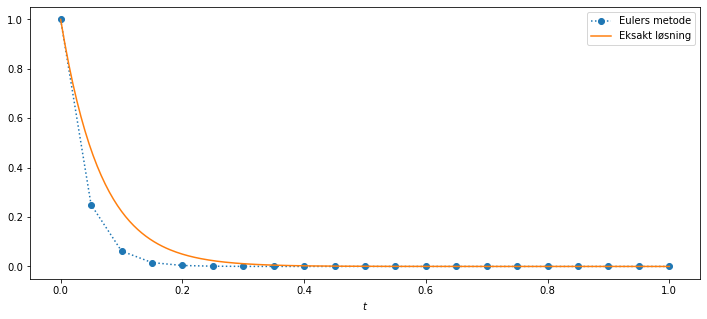

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

T = 1.0 # 
N = 20 # antall steg
x0 = 1 # startverdi
lam = -15.0 # lambda

h = T/N # steglengde

tn = np.linspace(0,T,N+1)


xn = np.zeros(N+1)
xn[0] = x0

for k in range(0,N):
    xn[k+1] = xn[k] + lam*h*xn[k]
    
plt.figure(figsize=(12,5))
plt.plot(tn,xn,':o')
plt.xlabel('$t$')

tm = np.linspace(0,T,301) # jevnt fordelte punkter for plott av eksakt løsning
plt.plot(tm,np.exp(lam*tm)) # eksakt løsning
plt.legend(["Eulers metode","Eksakt løsning"])